In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

In [2]:
#read csv
df = pd.read_csv("hour.csv",parse_dates=['dteday'])
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Data exploration

In [4]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


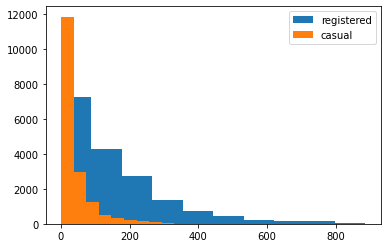

In [5]:
plt.hist(df['registered'])
plt.hist(df['casual'])
plt.legend(['registered','casual'])
plt.show()

In [6]:
sum(df['registered'])

2672662

In [7]:
sum(df['casual'])

620017

In [8]:
df_groupby_hour_mean = df.groupby('hr').mean()[['cnt']]
df_groupby_hour_mean

,cnt
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


<BarContainer object of 24 artists>

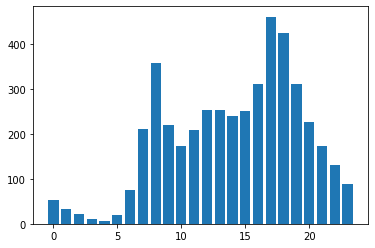

In [9]:
#plt.figure(figs)
plt.bar(df_groupby_hour_mean.index,df_groupby_hour_mean['cnt'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hr', ylabel='cnt'>

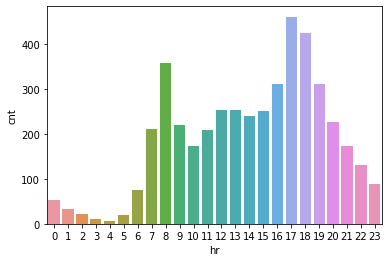

In [10]:
sns.barplot(df_groupby_hour_mean.index,df_groupby_hour_mean['cnt'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='cnt'>

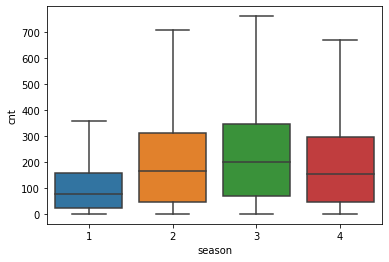

In [11]:
sns.boxplot(df['season'],df['cnt'],showfliers=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='holiday', ylabel='cnt'>

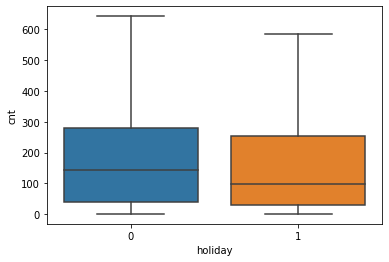

In [12]:
sns.boxplot(df['holiday'],df['cnt'],showfliers=False)

In [13]:
from scipy.stats import mannwhitneyu

In [14]:
non_holiday_df = df[df['holiday']==0]
holiday_df = df[df['holiday']==1]

In [15]:
mannwhitneyu(non_holiday_df['cnt'],holiday_df['cnt'])

MannwhitneyuResult(statistic=3789427.5, pvalue=4.964991884124428e-05)

In [16]:
print(non_holiday_df['cnt'].median())
print(holiday_df['cnt'].median())

144.0
97.0


(array([  78.,  786., 2342., 2631., 3047., 3216., 3942., 1044.,  279.,
          14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

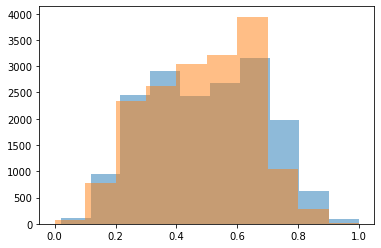

In [17]:
plt.hist(df['temp'],alpha = 0.5)
plt.hist(df['atemp'],alpha = 0.5)

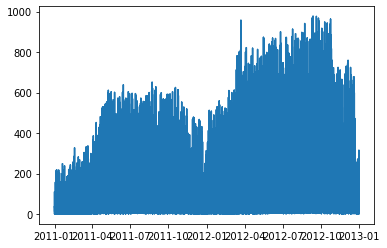

In [18]:
df
plt.plot(df['dteday'],df['cnt'])
#sns.boxplot(data = df, x='holiday',y='cnt',hu)

In [19]:
df_sample = df.set_index('dteday')

df_m_resample = df_sample.resample("M").sum()

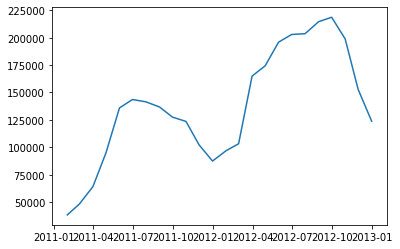

In [20]:
plt.plot(df_m_resample['cnt'])

### data preparation

In [21]:
X = df.drop(['instant','dteday','registered','casual','cnt'],axis=1)
y = df['cnt']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [23]:
first_80 = round(0.8*len(X))

In [24]:
X_train = X[:first_80]
X_test = X[first_80:]

y_train = y[:first_80]
y_test = y[first_80:]

In [25]:
dummy = DummyRegressor()
dummy.fit(X_train,y_train)
dummy_pred = dummy.predict(X_test)

232.60837481037086


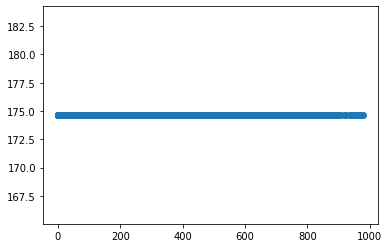

In [26]:
print(np.sqrt(mean_squared_error(y_test,dummy_pred)))
plt.scatter(y_test,dummy_pred)

In [27]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

183.27784731011985


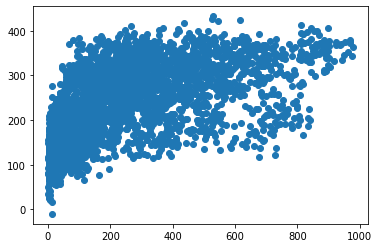

In [28]:
print(np.sqrt(mean_squared_error(y_test,lr_pred)))
plt.scatter(y_test,lr_pred)

In [51]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

58.22208335024837


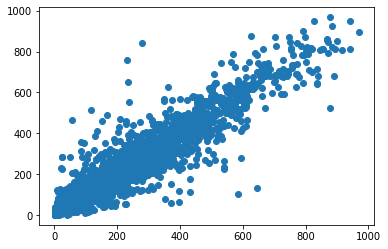

In [54]:
print(np.sqrt(mean_squared_error(y_test,dt_pred)))
plt.scatter(y_test,dt_pred)

In [34]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)


70.2709355981408


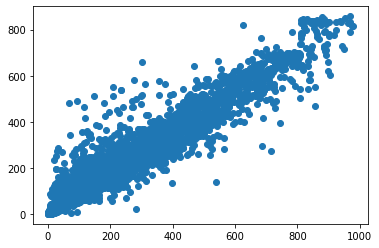

In [35]:
print(np.sqrt(mean_squared_error(y_test,rf_pred)))
plt.scatter(y_test,rf_pred)

In [36]:
# create new col called prediction
# first 80% ->original cnt
# last 20% -> prediction
prediction_column = list(y_train)+list(rf_pred)

df_sample['predict'] = prediction_column
df_sample

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,predict
dteday,,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,16.00
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,40.00
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,32.00
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,13.00
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,221.08
2012-12-31,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,170.94
2012-12-31,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,115.70


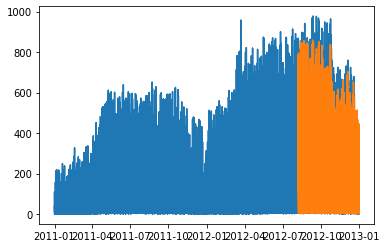

In [37]:
plt.plot(df_sample['cnt'])
plt.plot(df_sample['predict'][first_80:])

In [38]:
df_m_resample = df_sample.resample('M').sum()
df_m_resample

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,predict
dteday,,,,,,,,,,,,,,,,,
2011-01-31,237016,688,0,688,8168,24,2018,429,1014,135.82,140.1854,394.95,135.8697,3073,35116,38189,38189.000000
2011-02-28,657437,649,0,1298,7649,24,1957,436,944,184.30,185.4385,363.25,148.9139,6242,41973,48215,48215.000000
2011-03-31,1242825,990,0,2190,8506,0,2202,541,1135,241.80,237.1618,416.14,169.5245,12826,51219,64045,64045.000000
2011-04-30,1745013,1438,0,2876,8277,24,2279,479,1120,338.66,328.3127,480.45,175.5113,22346,72524,94870,94870.000000
2011-05-31,2349924,1488,0,3720,8556,24,2088,504,1065,429.46,409.8053,530.74,134.8680,31050,104771,135821,135821.000000
2011-06-30,2801160,1680,0,4320,8280,0,2184,528,942,499.02,465.5228,427.14,128.3007,30612,112900,143512,143512.000000
2011-07-31,3439140,2232,0,5208,8556,24,2280,480,866,564.38,528.7312,438.71,127.7206,36452,104889,141341,141341.000000
2011-08-31,3918160,2193,0,5848,8412,0,2124,552,946,515.76,479.2798,457.33,137.5098,28842,107849,136691,136691.000000
2011-09-30,4362228,2343,0,6453,8274,24,2225,501,1192,439.46,407.6798,562.00,109.5268,26545,100873,127418,127418.000000


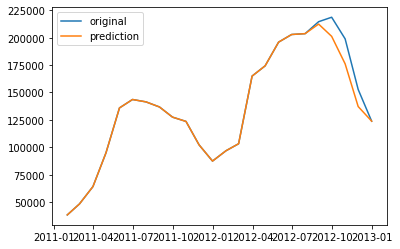

In [39]:
plt.plot(df_m_resample['cnt'])
plt.plot(df_m_resample['predict'])
plt.legend(['original','prediction'])